In [109]:
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [110]:
def import_data(filename):
    with open(filename,'r') as f:
        data = json.load(f)
        
    H_creation_time =  [sim["Time_H"] for sim in data["Simulations"]]
    brute_force_timings = [sim["Time_Qutip"] for sim in data["Simulations"]]
    DMRG_timings = [sim["Time_Julia"] for sim in data["Simulations"]]
    n_modes =  [sim["n_modes"] for sim in data["Simulations"]]
    Relative_Error = [sim["Realative_Error"] for sim in data["Simulations"]]
    Qutip_Evals = [sim["Qutip Evals"] for sim in data["Simulations"]]
    DMRG_Evals = [sim["DMRG evals"] for sim in data["Simulations"]]
    return H_creation_time, brute_force_timings, DMRG_timings,n_modes,Relative_Error,Qutip_Evals,DMRG_Evals

# Brute Force diagonalization vs DMRG
#### Changing the number of modes  we confront Qutip diagonalization time vs DMRG

In [111]:
H_creation_time, brute_force_timings, DMRG_timings,n_modes,Relative_Error,Qutip_Evals,DMRG_Evals = import_data('../DMRG_time_bench.json')
    

[Text(0.1, 0, '2'), Text(1.1, 0, '3'), Text(2.1, 0, '4')]

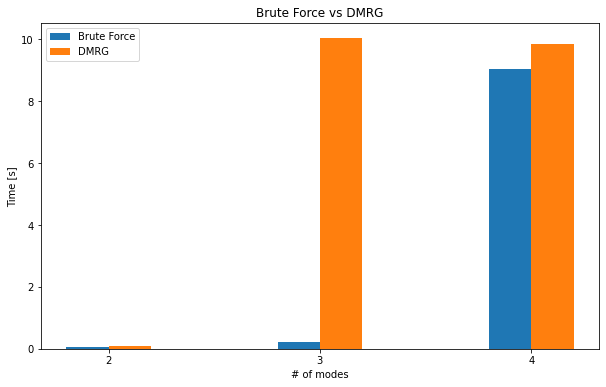

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
bar_width = .2
x = np.arange(len(n_modes))

ax.bar(x,
       brute_force_timings,
       width=bar_width,
       label = 'Brute Force')

ax.bar(x + bar_width,
       DMRG_timings,
       width=bar_width,
       label='DMRG')


ax.legend()

ax.set_title('Brute Force vs DMRG')
ax.set_ylabel('Time [s]')
ax.set_xlabel('# of modes')

ax.set_xticks(x + bar_width/2 )
ax.set_xticklabels(n_modes)

In [113]:
Relative_Error_ave = abs(np.array([np.mean(error[1:]) for error in Relative_Error]))
std = np.array([np.std(error[1:]) for error in Relative_Error])


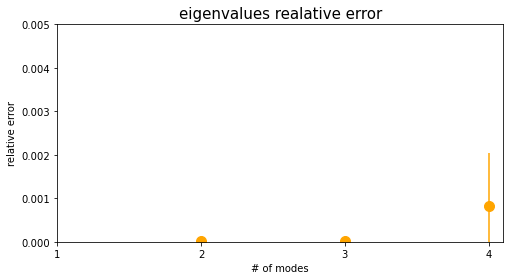

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.errorbar(n_modes, Relative_Error_ave, std, linestyle='None', 
            marker='.',
           ms=20,
           color = 'orange')
ax.set_ylim(0,5e-3)

ax.set_title("eigenvalues realative error",size=15)
ax.set_ylabel('relative error')
ax.set_xlabel('# of modes')
plt.xticks(range(1,5))
plt.show()

### Hamiltonian Matrix creation time


/tmp/ipykernel_11523/2687456883.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(n_modes)


[Text(-0.5, 0, '2'),
 Text(0.0, 0, '3'),
 Text(0.5, 0, '4'),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, ''),
 Text(2.5, 0, '')]

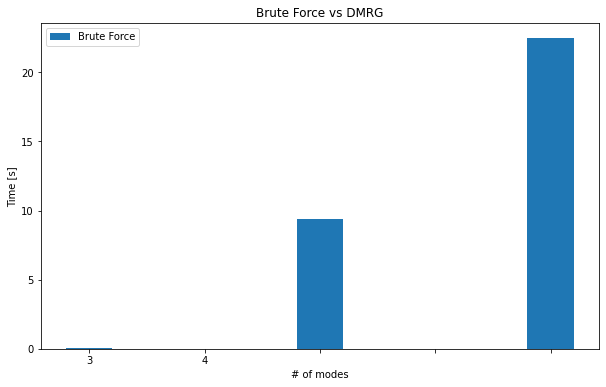

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.arange(len(n_modes))

ax.bar(x,
       H_creation_time,
       width=bar_width,
       label = 'Brute Force')


ax.legend()

ax.set_title('Brute Force vs DMRG')
ax.set_ylabel('Time [s]')
ax.set_xlabel('# of modes')

ax.set_xticklabels(n_modes)